In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
def pokaz(im, tytul = "", osie = False):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        plt.imshow(im)
    plt.title(tytul)
    
def pliob(listaobr, ile_k = 1, listatyt = [], wart_dpi = 100, osie = False):
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i], listatyt[i], osie)
    plt.show()

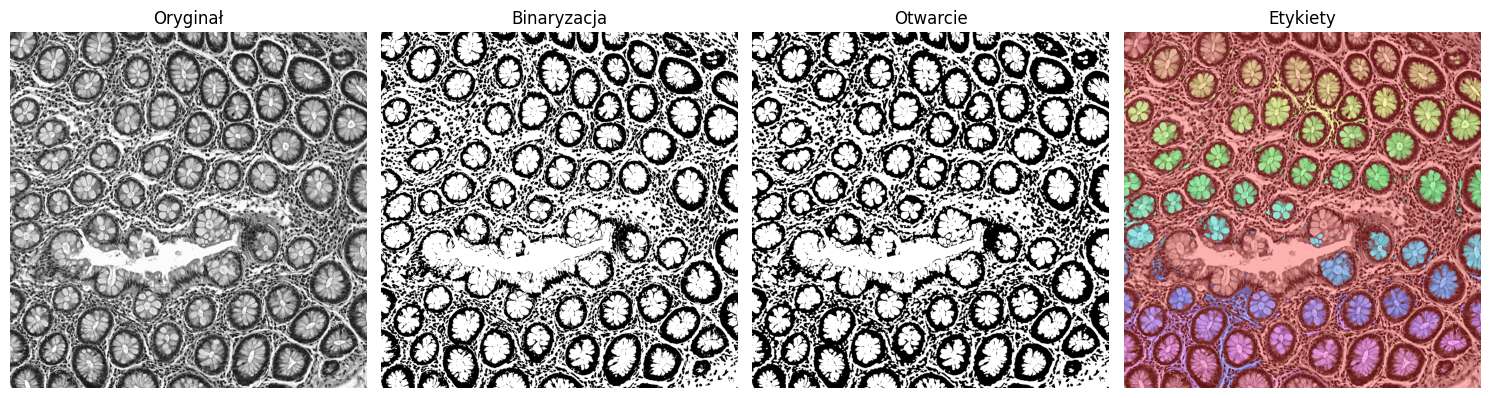

Liczba wykrytych obiektów: 723


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Wczytaj obraz w odcieniach szarości
obraz = cv2.imread('../temp/patient0.tif', cv2.IMREAD_GRAYSCALE)

# Binaryzacja
_, thresh = cv2.threshold(obraz, 120, 255, cv2.THRESH_BINARY)

# Filtr otwarcia
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Etykietowanie
num_labels, labels = cv2.connectedComponents(opening, connectivity=8)

# Generowanie kolorowych etykiet
hsv = np.zeros((*labels.shape, 3), dtype=np.uint8)
hsv[..., 1] = 255  # Pełne nasycenie
hsv[..., 2] = 255  # Pełna jasność

for label in range(1, num_labels):
    hsv[labels == label, 0] = int(179 * label / num_labels)  # Hue w zakresie 0-179

color_labels = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Nakładanie etykiet na oryginalny obraz
original_bgr = cv2.cvtColor(obraz, cv2.COLOR_GRAY2BGR)
alpha = 0.3  # Współczynnik przeźroczystości
blended = cv2.addWeighted(original_bgr, 1 - alpha, color_labels, alpha, 0)

# Przygotowanie wyników do wyświetlenia
titles = ['Oryginał', 'Binaryzacja', 'Otwarcie', 'Etykiety']
images = [
    obraz,
    thresh,
    opening,
    cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)  # Konwersja BGR -> RGB dla matplotlib
]

# Wizualizacja
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    if i < 3:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Liczba wykrytych obiektów: {num_labels - 1}")

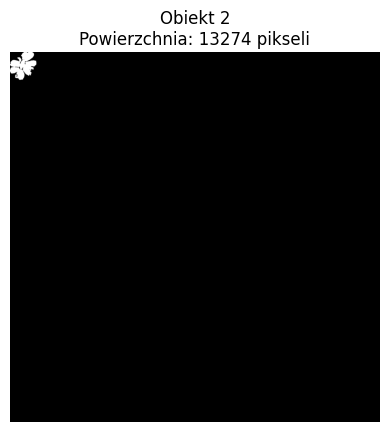

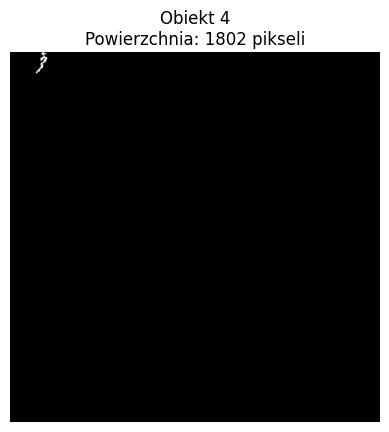

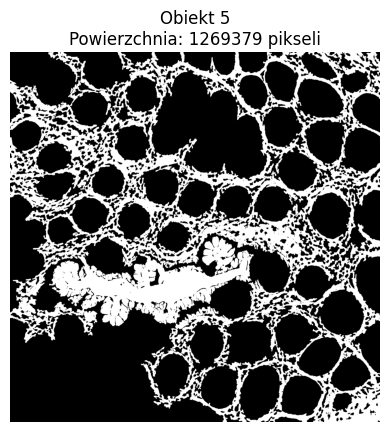

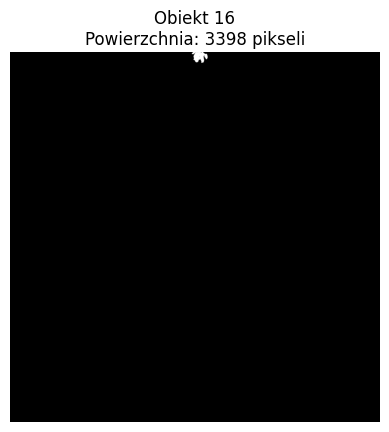

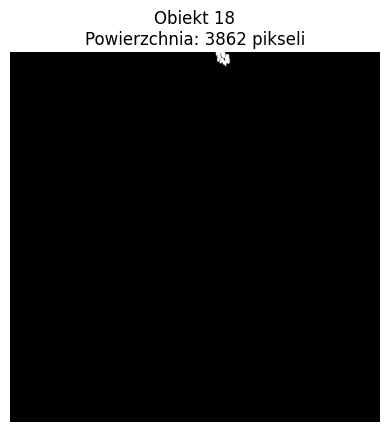

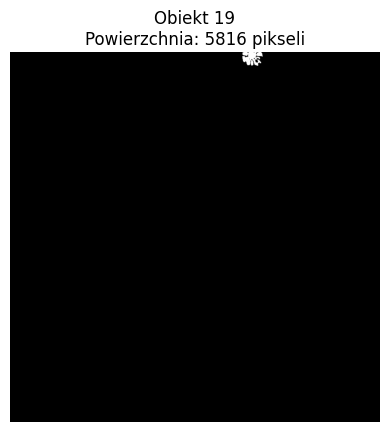

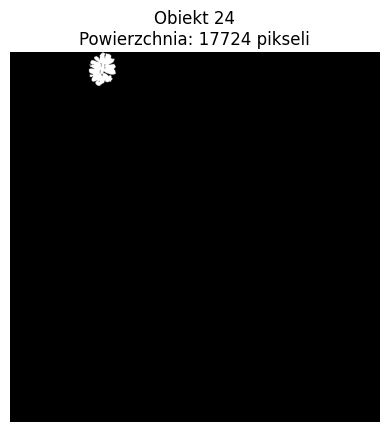

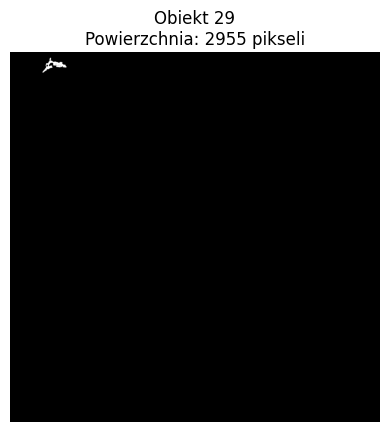

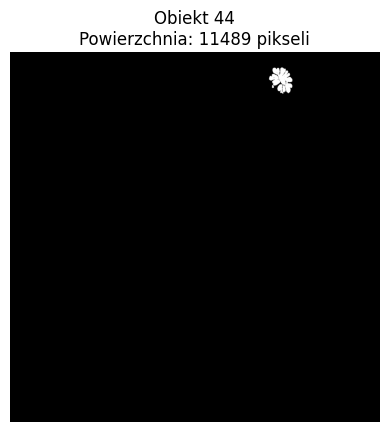

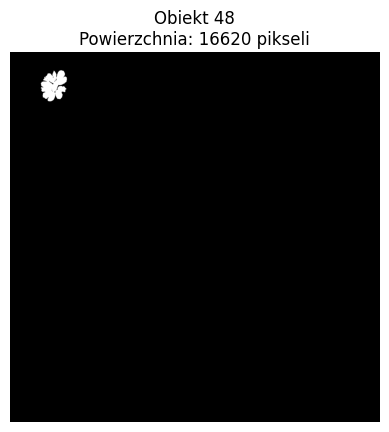

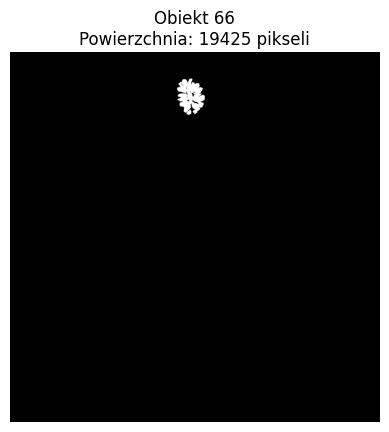

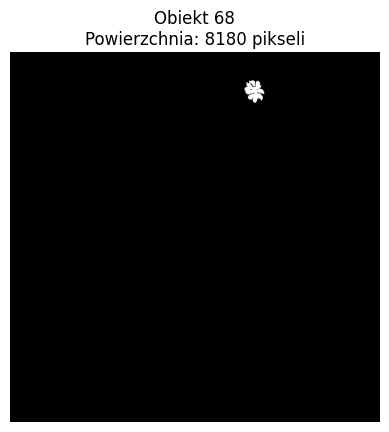

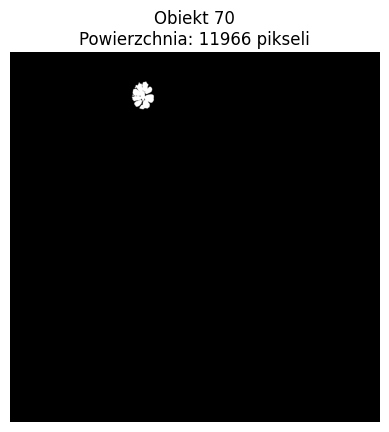

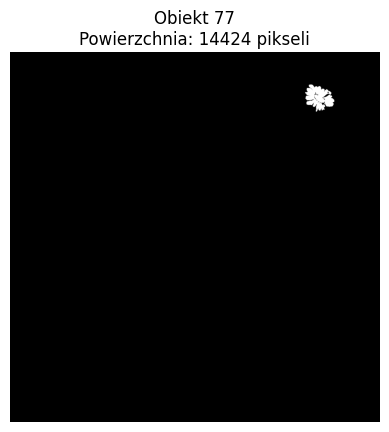

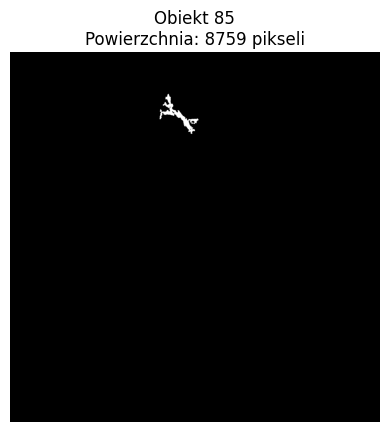

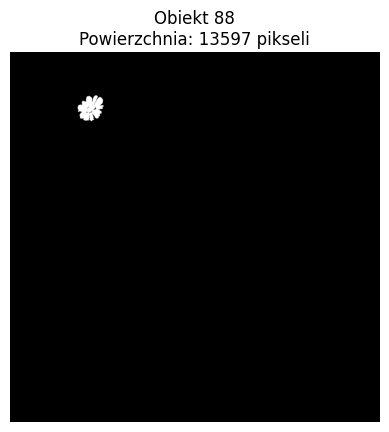

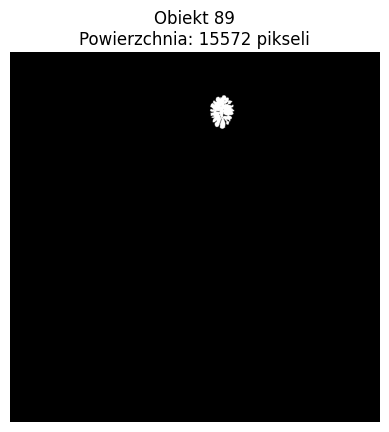

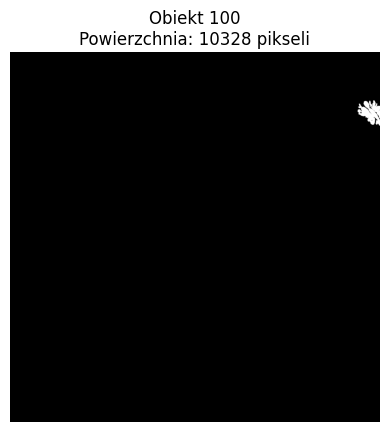

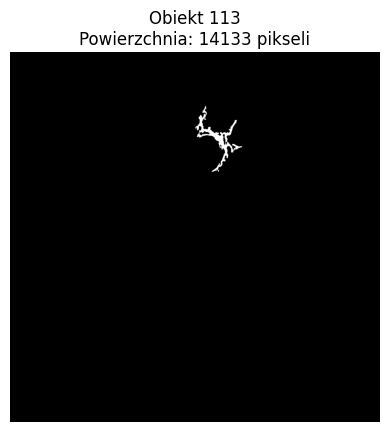

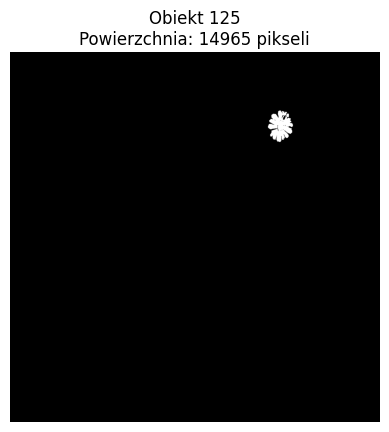

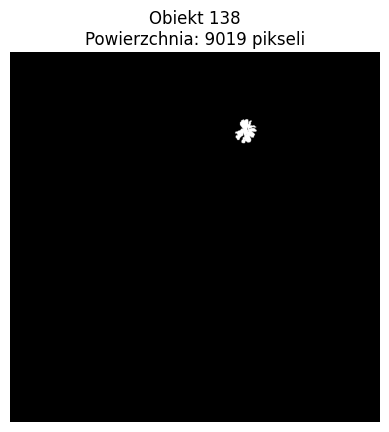

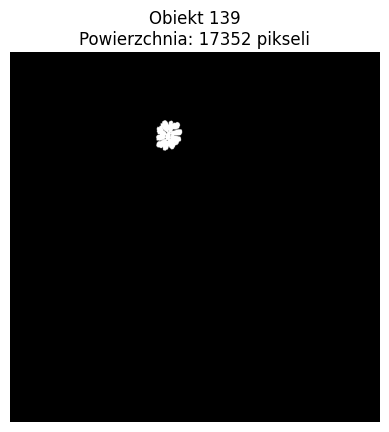

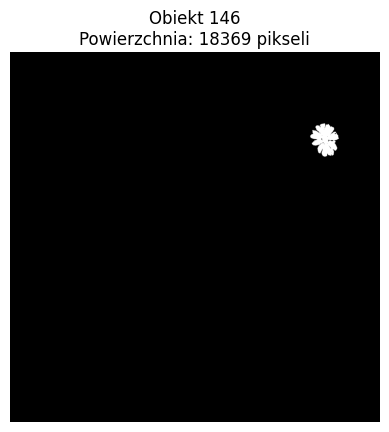

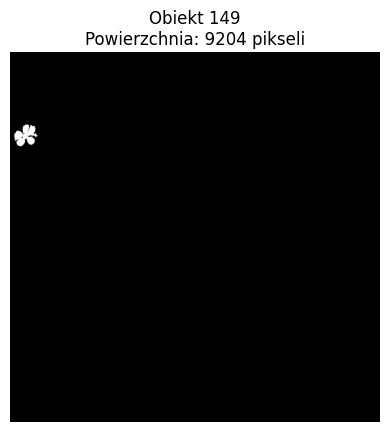

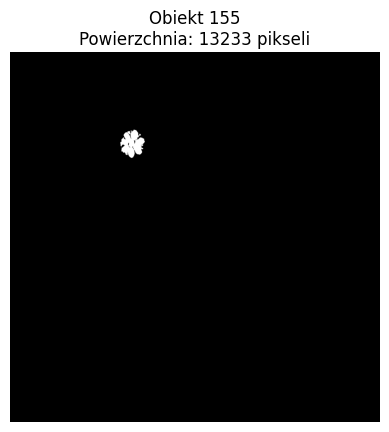

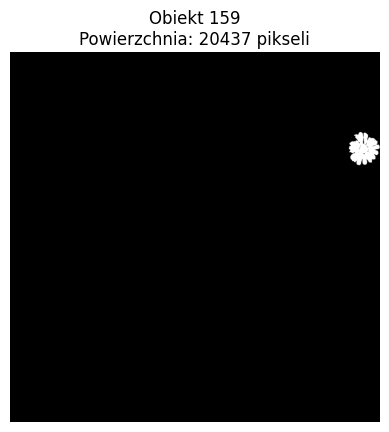

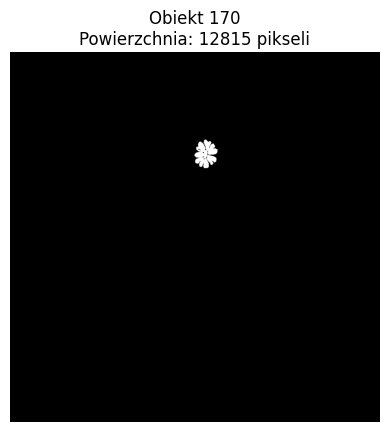

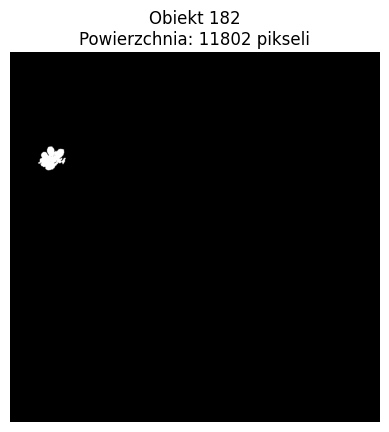

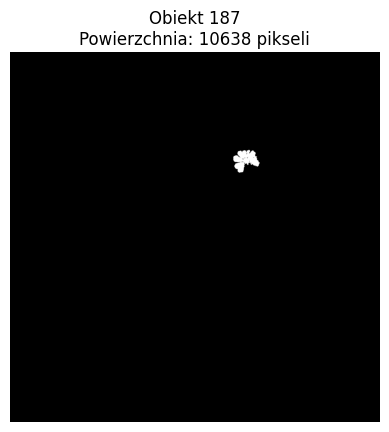

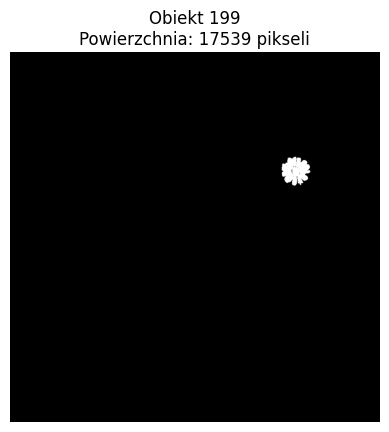

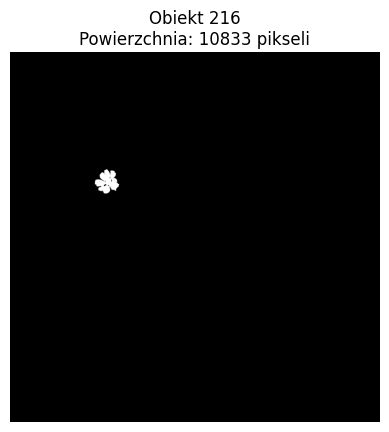

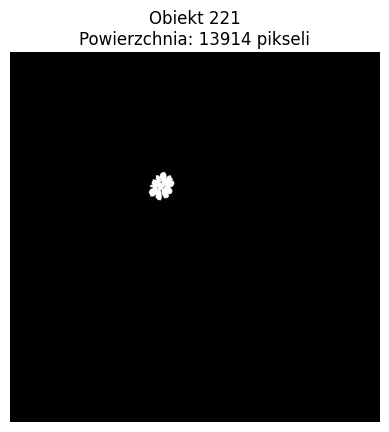

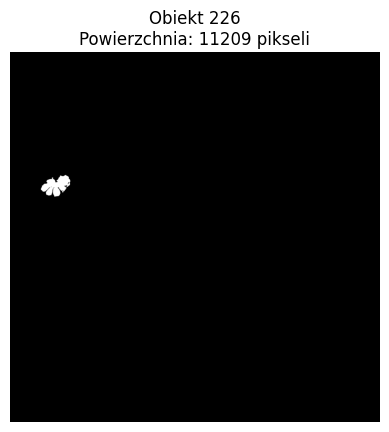

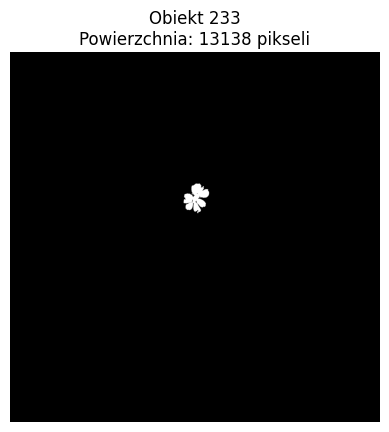

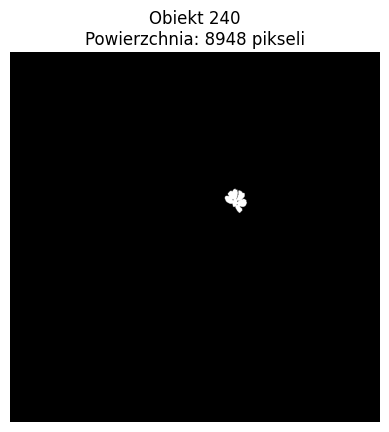

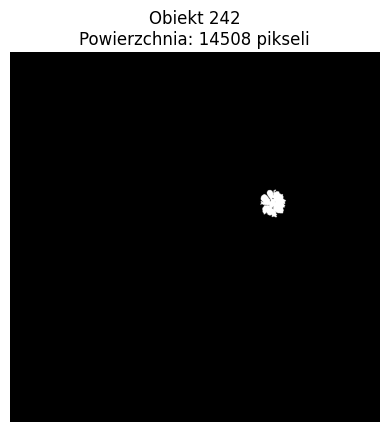

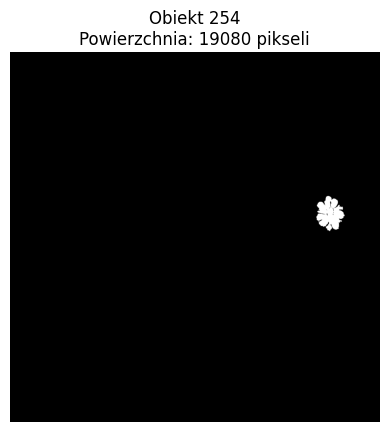

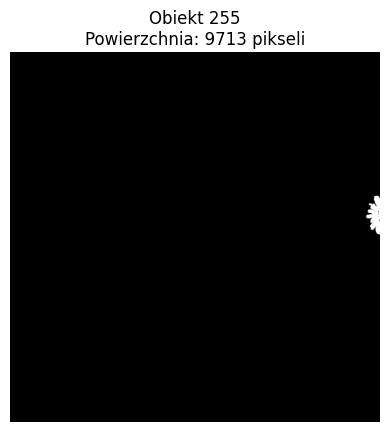

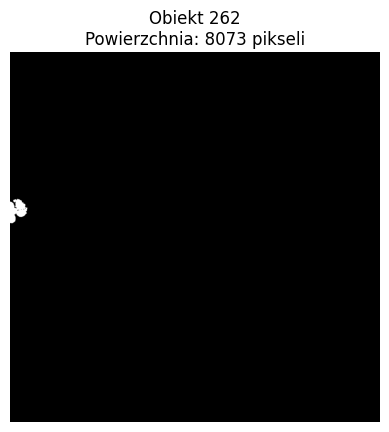

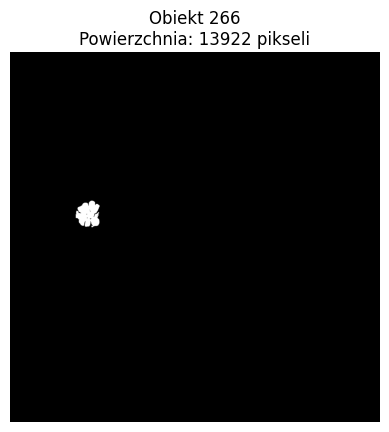

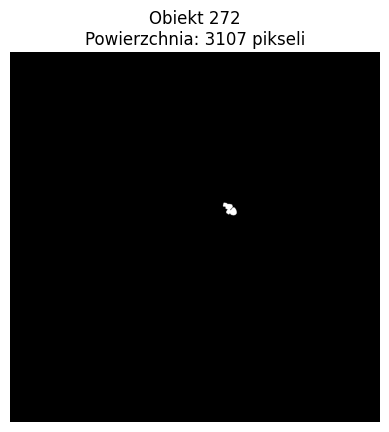

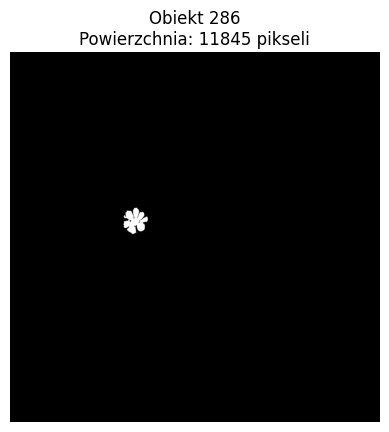

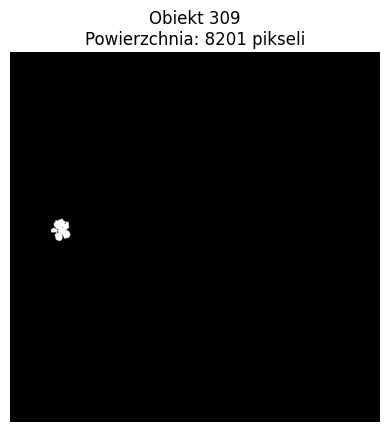

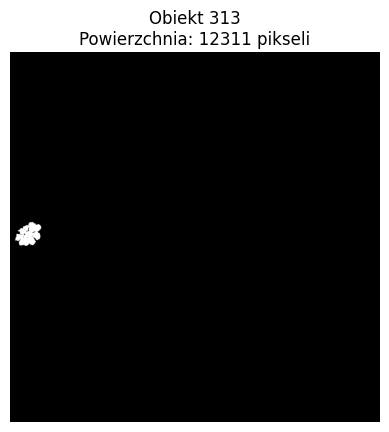

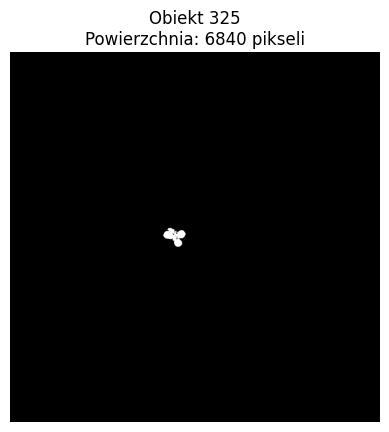

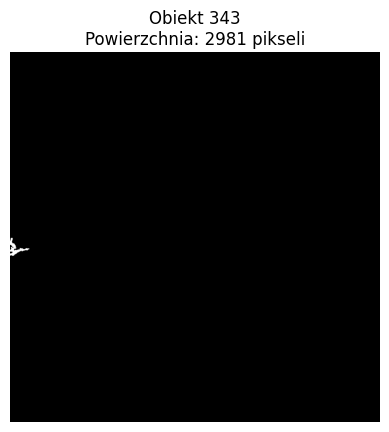

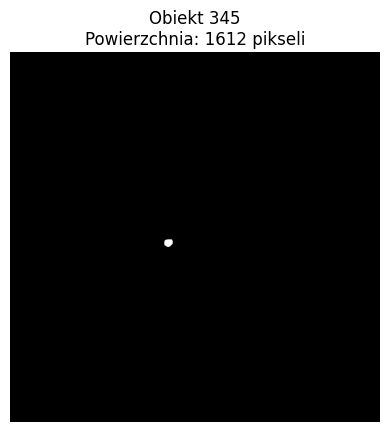

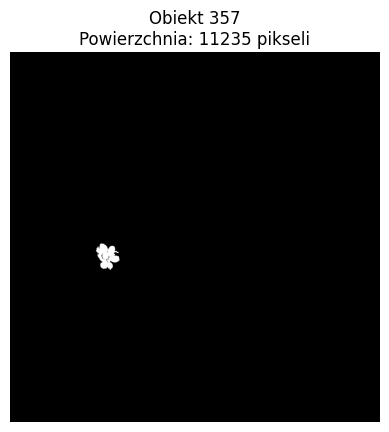

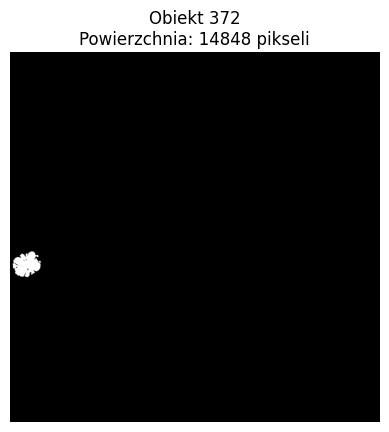

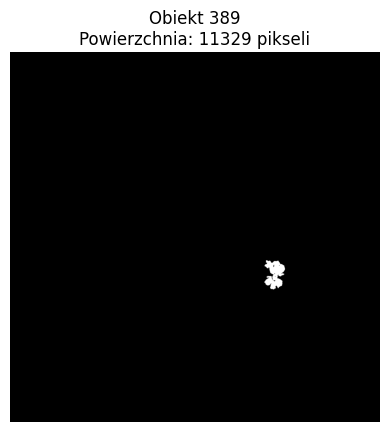

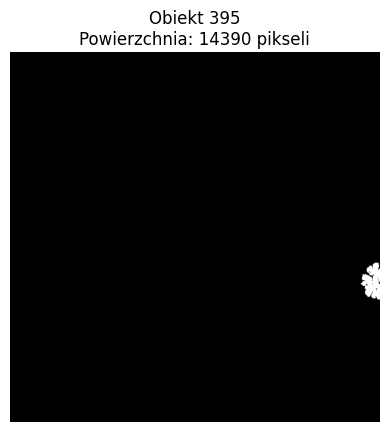

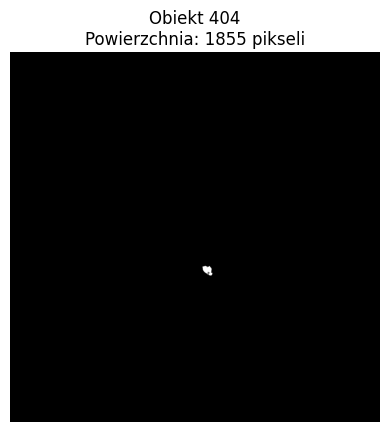

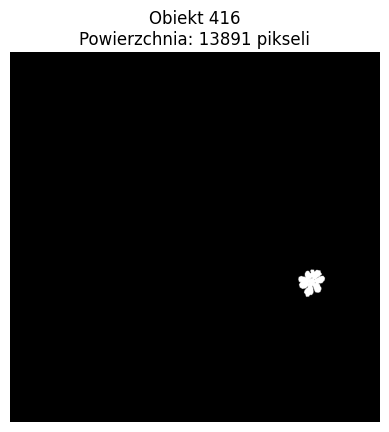

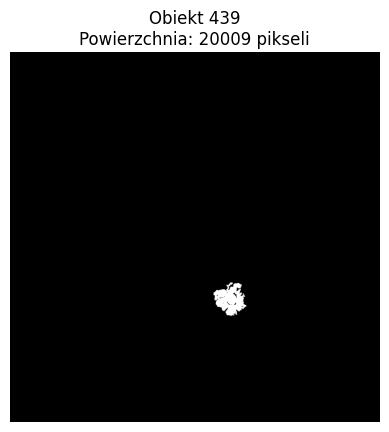

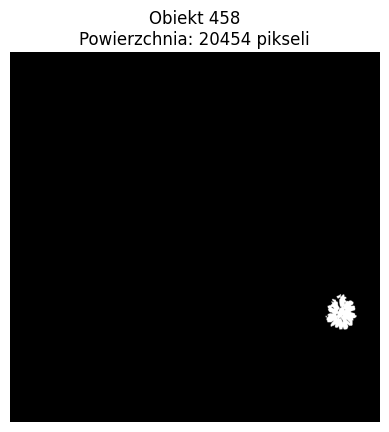

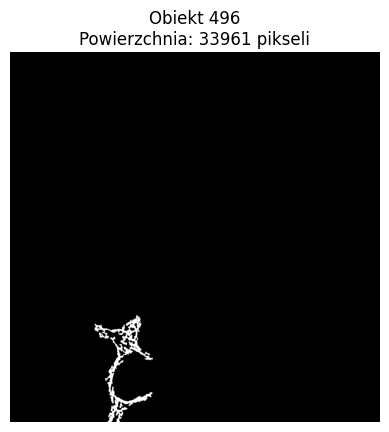

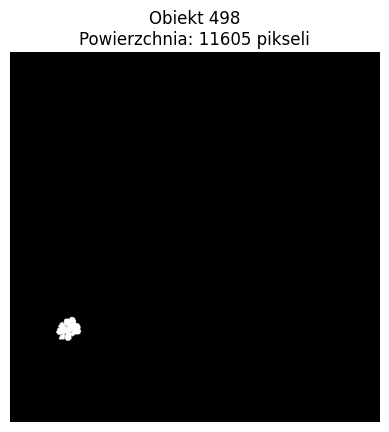

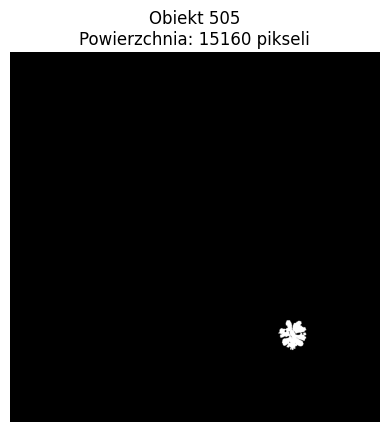

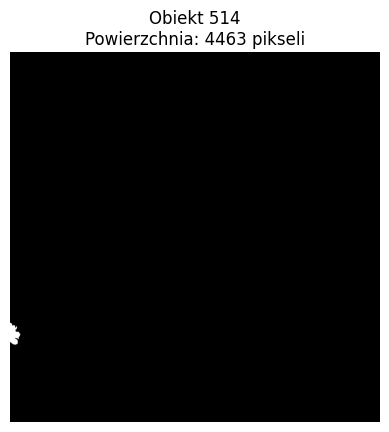

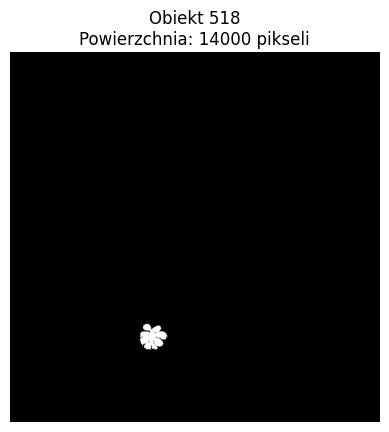

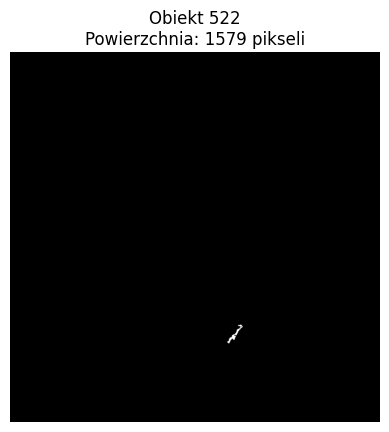

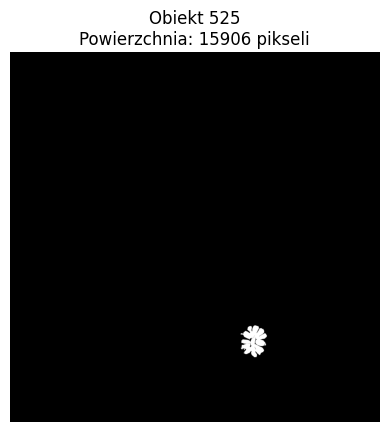

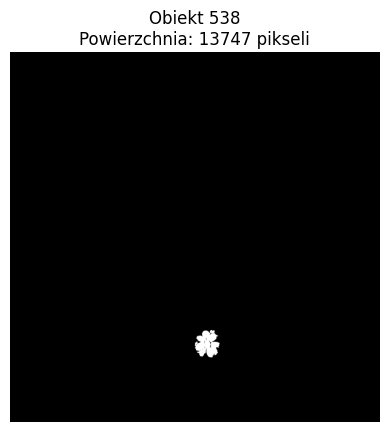

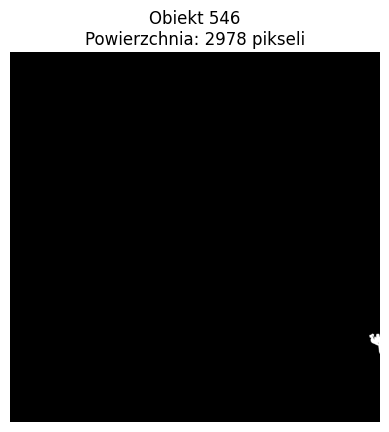

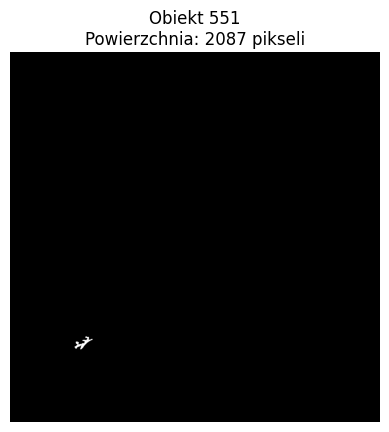

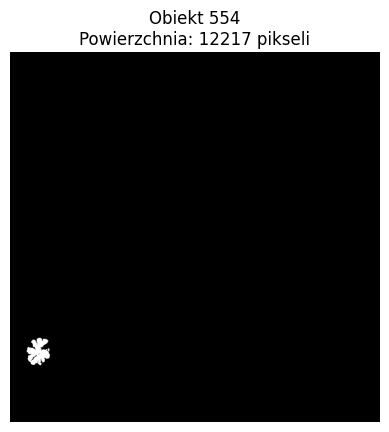

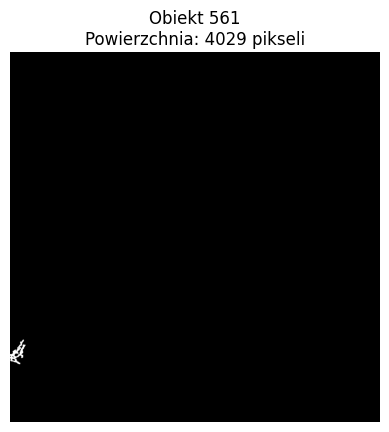

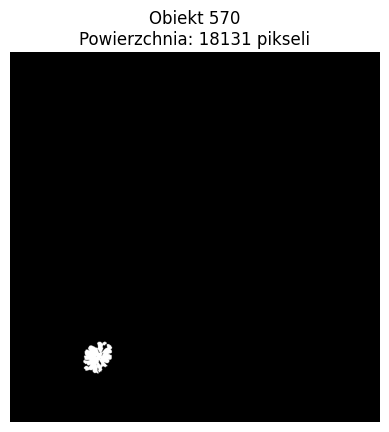

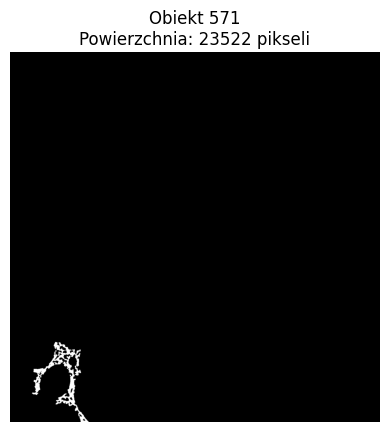

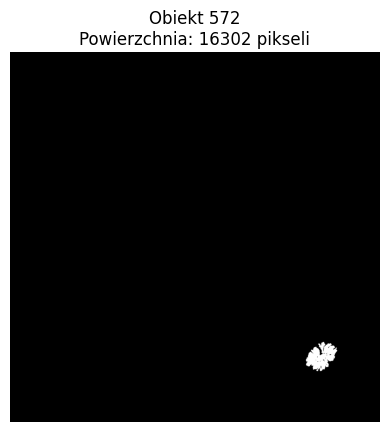

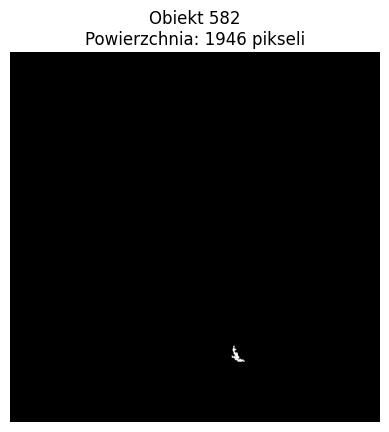

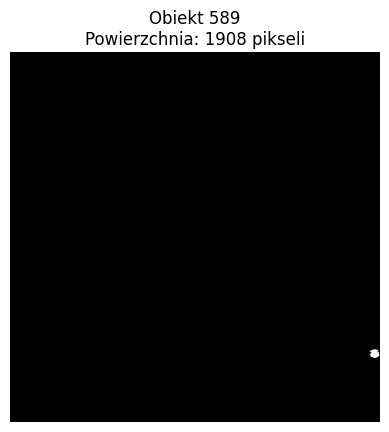

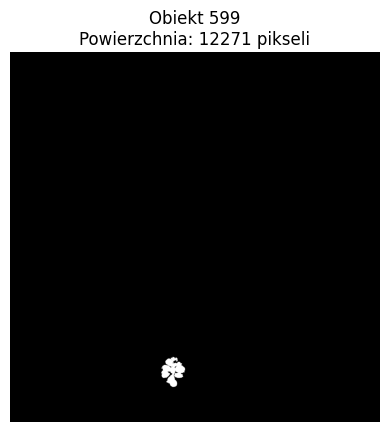

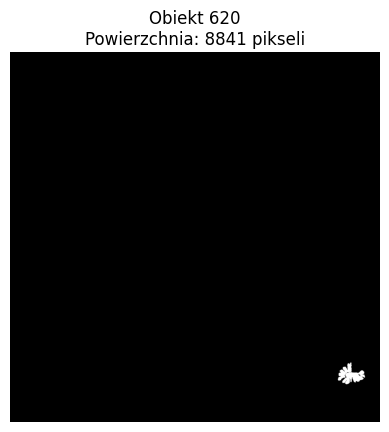

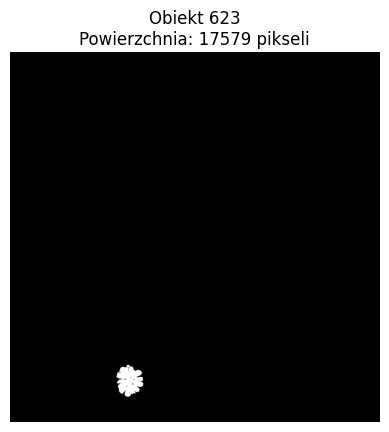

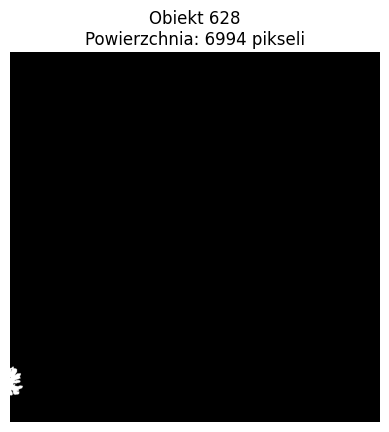

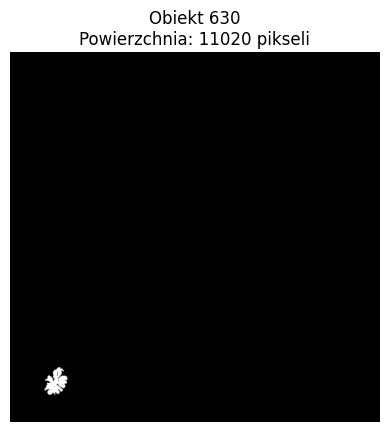

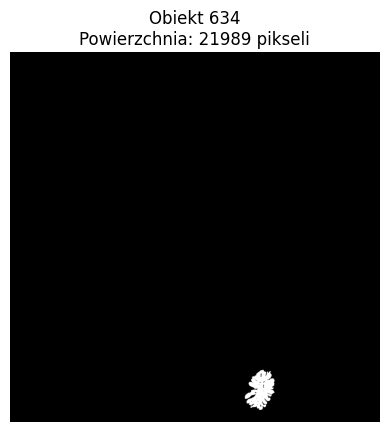

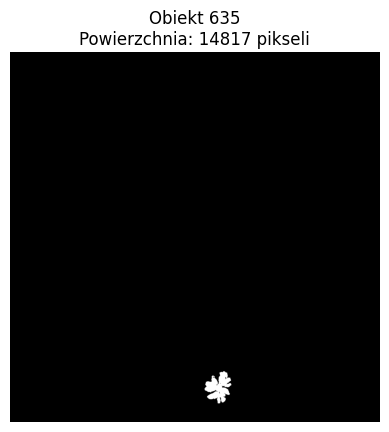

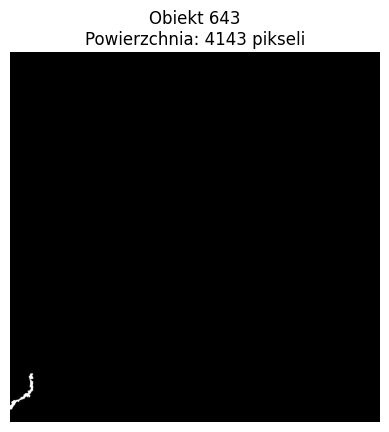

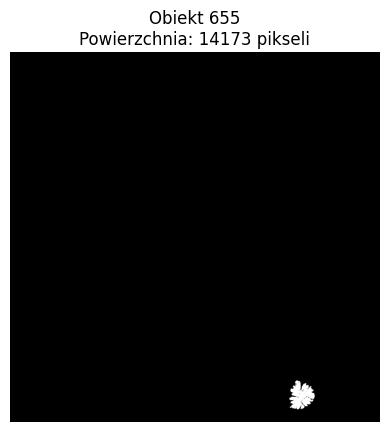

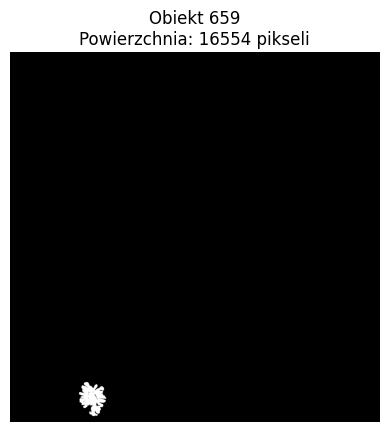

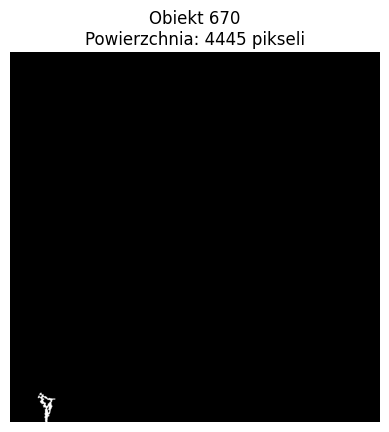

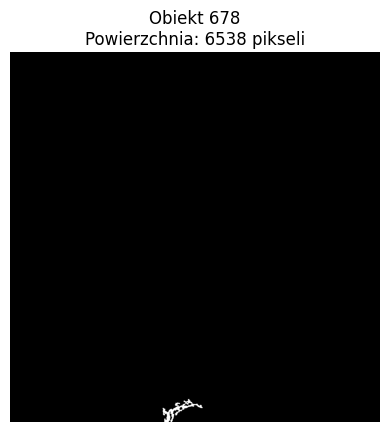

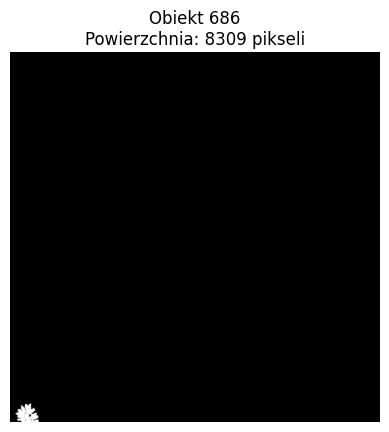

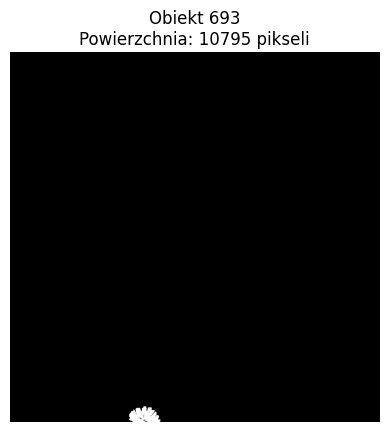

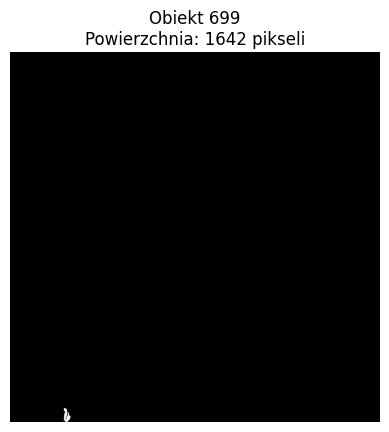

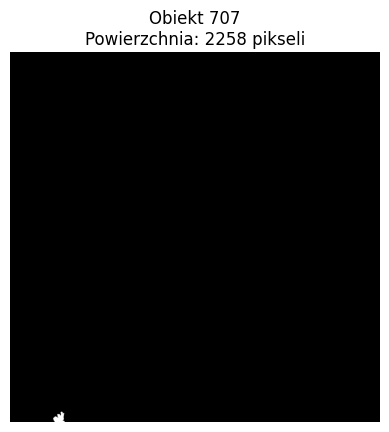

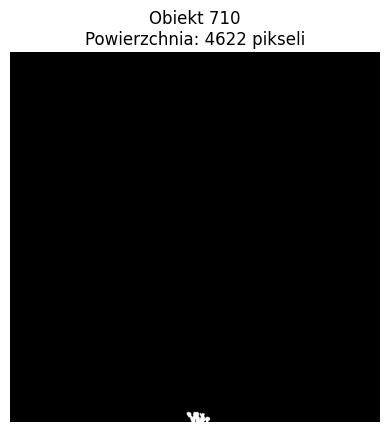

In [6]:
for label in range(1, num_labels):
    # Oblicz powierzchnię obiektu (liczbę białych pikseli)
    area = np.count_nonzero(labels == label)
    
    # Warunek filtrowania
    if area > 1500:
        mask = np.where(labels == label, 255, 0).astype(np.uint8)
        
        plt.imshow(mask, cmap='gray')
        plt.title(f'Obiekt {label}\nPowierzchnia: {area} pikseli')
        plt.axis('off')
        plt.show()